# Computer Vision Homework 4

Question 1

Amirkabir University of Technology

Dr. Safabakhsh

By Gholamreza Dar 400131018

Fall 2022


## Imports

In [21]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

from skimage.transform import resize
from skimage.util.shape import view_as_windows
from skimage.feature import graycomatrix, graycoprops

# from numba import jit, njit, prange

import cv2

from joblib import Parallel, delayed
import time



## Functions

In [22]:
def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure(figsize=(s,s))
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

def uint8ify(img):
    img -= img.min()
    img /= img.max()
    img *= 255
    return np.uint8(img)

def overlay(a,b):
    # a and b should be float images and between 0-1

    mask = a >= 0.5 # generate boolean mask of everywhere a > 0.5 
    ab = np.zeros_like(a) # generate an output container for the blended image 

    # now do the blending 
    ab[~mask] = (2*a*b)[~mask] # 2ab everywhere a<0.5
    ab[mask] = (1-2*(1-a)*(1-b))[mask] # else this
    
    return ab

def before_after(img_a, img_b, name='', vmin=None, vmax=None, effect_name='Processed'):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(10,4))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].set_title(f'{name} Original')
    axs[1].set_title(f'{name} {effect_name}')
    if vmin is not None and vmax is not None:
        axs[0].imshow(img_a, cmap='gray', vmin=vmin, vmax=vmax)
        axs[1].imshow(img_b, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        axs[0].imshow(img_a, cmap='gray')
        axs[1].imshow(img_b, cmap='gray')
    plt.show()

## Load Images

In [23]:
def downsample(img, factor=2):
    return resize(img, (img.shape[0]//factor, img.shape[1]//factor), anti_aliasing=True)

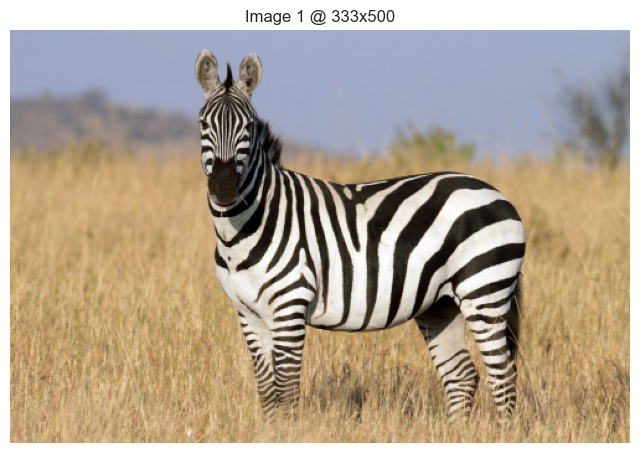

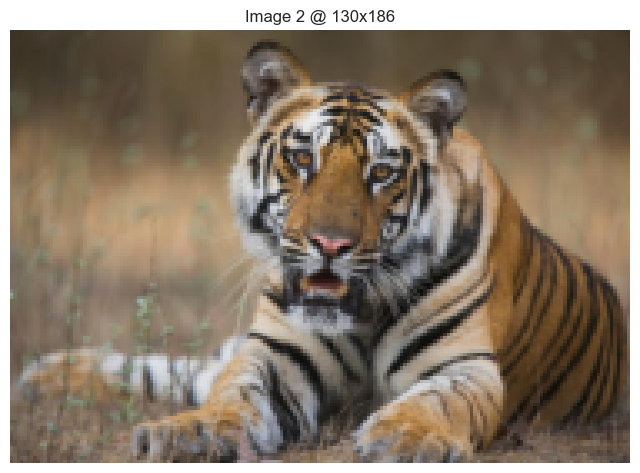

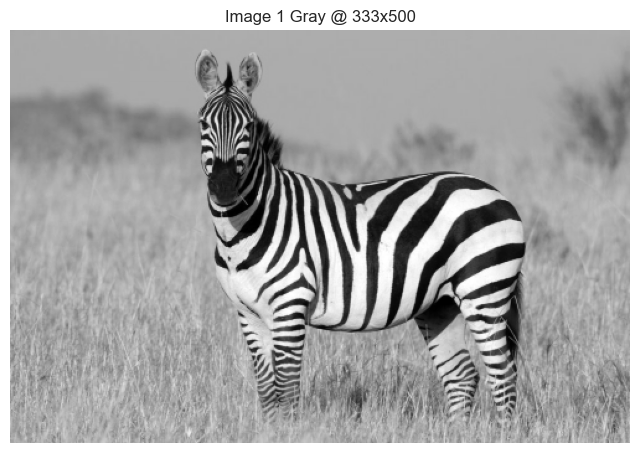

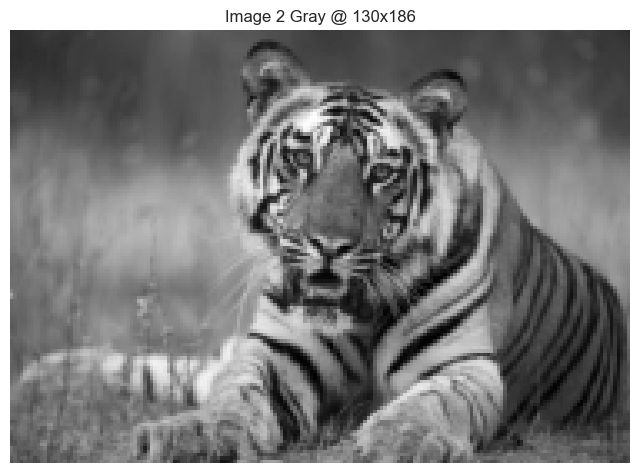

In [24]:
img1 = (downsample(rgb(cv2.imread('data\img1.jpg')), factor=2)*255).astype(np.uint8)
img1_gray = gray(img1)
img2 = (downsample(rgb(cv2.imread('data\img2.jpg')), factor=5)*255).astype(np.uint8)
img2_gray = gray(img2)

disp(img1, f'Image 1 @ {img1.shape[0]}x{img1.shape[1]}')
disp(img2, f'Image 2 @ {img2.shape[0]}x{img2.shape[1]}')

disp(img1_gray, f'Image 1 Gray @ {img1_gray.shape[0]}x{img1_gray.shape[1]}')
disp(img2_gray, f'Image 2 Gray @ {img2_gray.shape[0]}x{img2_gray.shape[1]}')

## Clustering using kmeans

In [25]:
# Cluster pixels by color using kmeans
from sklearn.cluster import KMeans
from matplotlib import colors

def segment_using_kmeans(img, n_clusters=2, debug=True):
    img_shape = img.shape
    org_image = img.copy()
    img = img.reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(img)

    labels = kmeans.labels_.reshape(img_shape)

    # Make a color map of fixed colors
    if n_clusters == 3:
        cmap = colors.ListedColormap([[10/255, 10/255, 10/255], [128/255, 64/255, 128/255], [102/255, 102/255, 156/255]])
        bounds=[0,1,2,3]
    elif n_clusters == 2:
        cmap = colors.ListedColormap([[128/255, 64/255, 128/255], [102/255, 102/255, 156/255]])
        bounds=[0,1,2]

    norm = colors.BoundaryNorm(bounds, cmap.N)

    # plot labels
    if debug:
        fig, ax = plt.subplots(1, 2, figsize=(12, 10), constrained_layout=True)
        ax[0].imshow(org_image, cmap='gray')
        ax[0].set_title('Gray image')
        ax[0].set_axis_off()

        ax[1].imshow(labels, cmap=cmap, norm=norm)
        ax[1].set_title('Segmented image')
        ax[1].set_axis_off()
        plt.show()

    return kmeans.cluster_centers_[kmeans.labels_].reshape(img_shape)

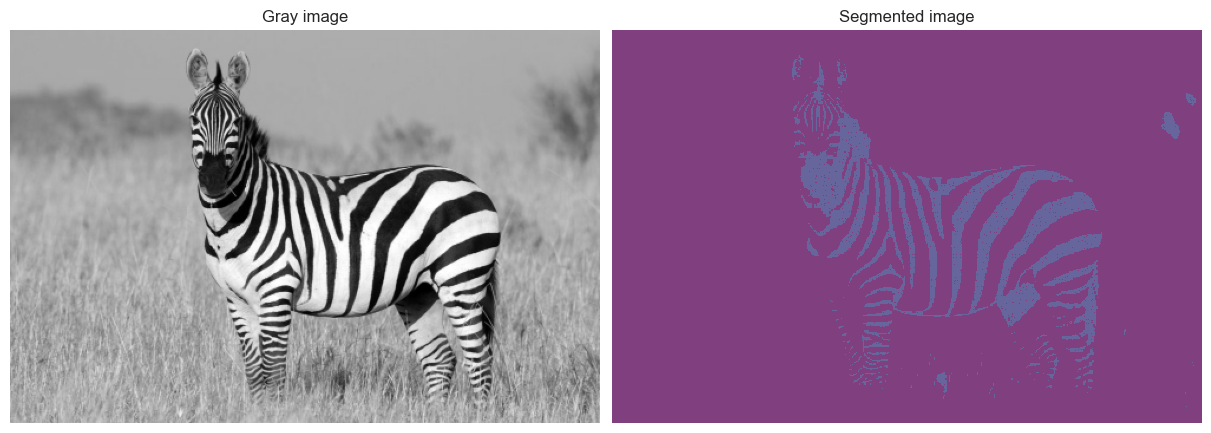

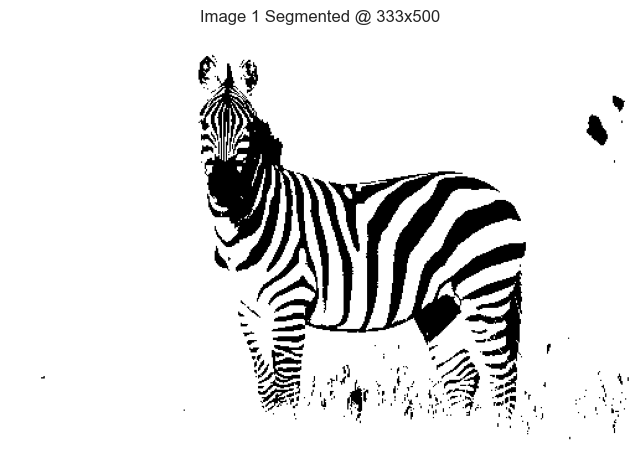

In [26]:
img_1_segmented = segment_using_kmeans(img1_gray, n_clusters=2)

disp(img_1_segmented, f'Image 1 Segmented @ {img_1_segmented.shape[0]}x{img_1_segmented.shape[1]}')

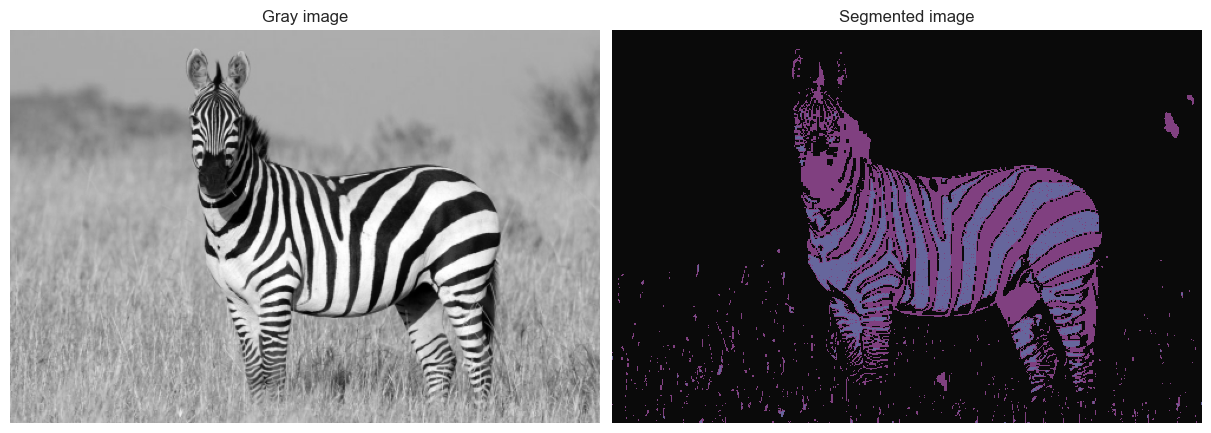

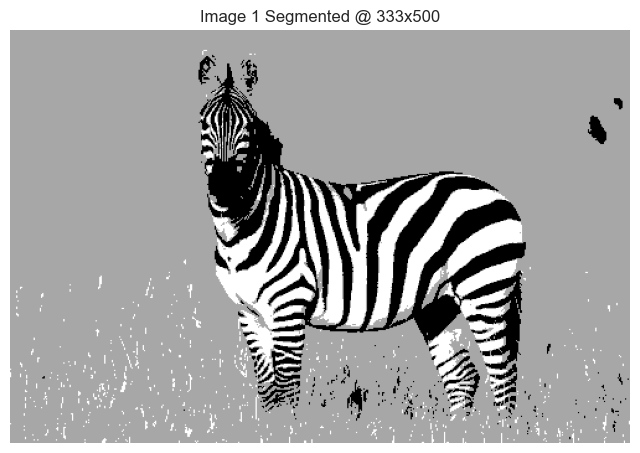

In [27]:
img_1_segmented = segment_using_kmeans(img1_gray, n_clusters=3)

disp(img_1_segmented, f'Image 1 Segmented @ {img_1_segmented.shape[0]}x{img_1_segmented.shape[1]}')

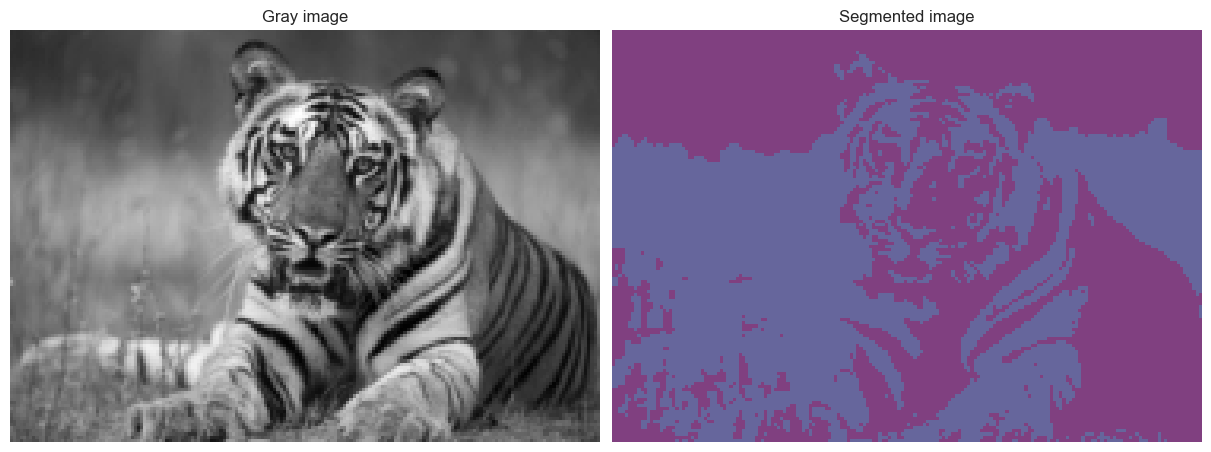

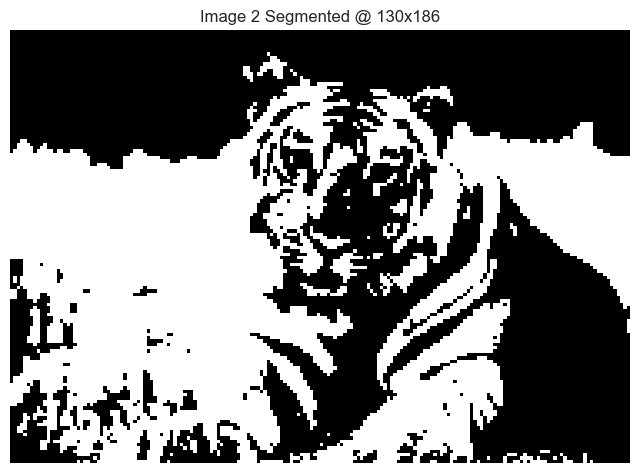

In [28]:
img_2_segmented = segment_using_kmeans(img2_gray, n_clusters=2)

disp(img_2_segmented, f'Image 2 Segmented @ {img_2_segmented.shape[0]}x{img_2_segmented.shape[1]}')

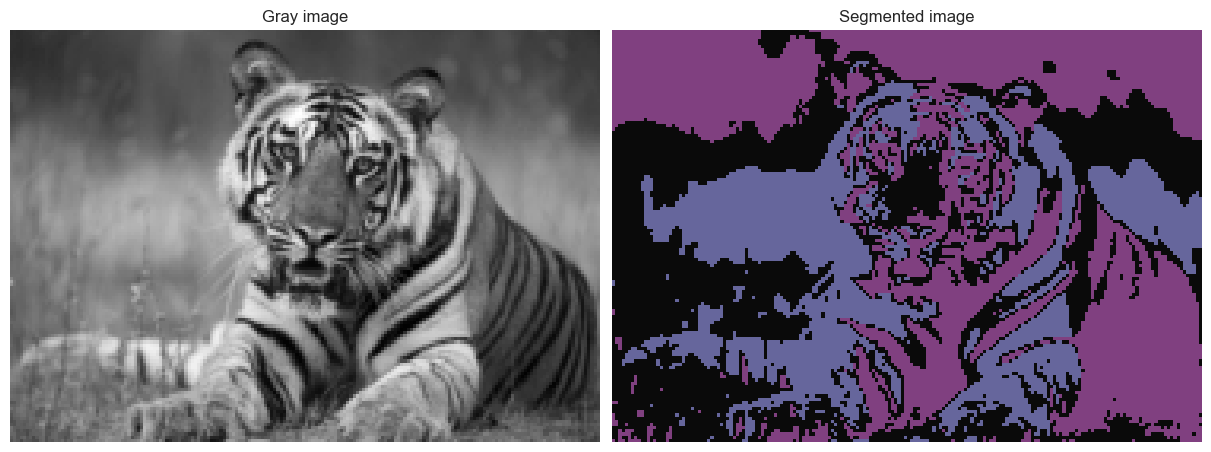

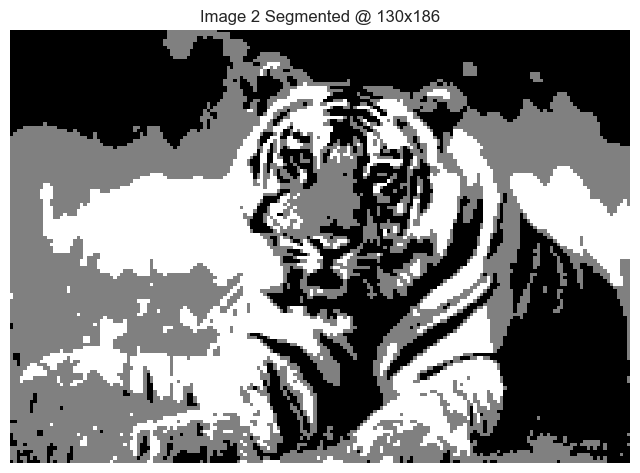

In [29]:
img_2_segmented = segment_using_kmeans(img2_gray, n_clusters=3)

disp(img_2_segmented, f'Image 2 Segmented @ {img_2_segmented.shape[0]}x{img_2_segmented.shape[1]}')